In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
from Tools import viz, commonfxns as cf, mplRC, evalfxns as ev, OAPBuoyData as OAP, ccfxns as cc, PapaData as OSP, BATSData as BATS, HOTData as HOT, OAPBuoyComp as bc
from Tools import OAPBuoyComp as bc
import datetime as dt
import gsw
import dateutil
import cftime
import matplotlib.image as mpimg
import matplotlib.dates as mdates

mplRC.paperRC2()

%matplotlib inline

In [2]:
# load data for each site:
df=dict()
comps_m=dict() # monthly comps
comps_d=dict() # daily comps
OAPcomp_d=dict()  # OAP measured pH
OAPcomp_dC=dict() # OAP calculated pH

In [3]:
## BATS
df['BATS']=BATS.load(surface=True,cCalcs=True)
comps_m['BATS']=BATS.comp('phos','monthly',recalc=False)
comps_d['BATS']=BATS.comp('phos','daily',recalc=False)
OAPcomp_d['BATS']=bc.loadMoorComp(OAP.getID('BTM'),'phos',freq='daily',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
OAPcomp_dC['BATS']=bc.loadMoorComp(OAP.getID('BTM'),'phosC',freq='daily',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')

In [4]:
comps_m['BATS_T']=BATS.comp('tos','monthly',recalc=False)
comps_d['BATS_T']=BATS.comp('tos','daily',recalc=False)
OAPcomp_d['BATS_T']=bc.loadMoorComp(OAP.getID('BTM'),'tos',freq='daily',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')

In [5]:
## HOT
df['HOT']=HOT.load(surface=True,cCalcs=True)
comps_m['HOT']=HOT.comp('phos','monthly',recalc=False)
comps_d['HOT']=HOT.comp('phos','daily',recalc=False)
OAPcomp_d['HOT']=bc.loadMoorComp(OAP.getID('WHOTS'),'phos',freq='daily',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
OAPcomp_dC['HOT']=bc.loadMoorComp(OAP.getID('WHOTS'),'phosC',freq='daily',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')

In [6]:
comps_m['HOT_T']=HOT.comp('tos','monthly',recalc=False)
comps_d['HOT_T']=HOT.comp('tos','daily',recalc=False)
OAPcomp_d['HOT_T']=bc.loadMoorComp(OAP.getID('WHOTS'),'tos',freq='daily',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')

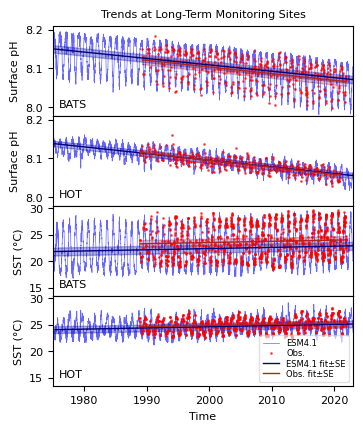

In [7]:
## make figure
aa1=.6 # alpha lines
aa2=.3 # alpha regions
fig=plt.figure(figsize=(5,6))
ax=dict()
ax['BATS']=fig.add_axes([.2,.6,.6,.15]) # left, bottom, width, height
ax['HOT']=fig.add_axes([.2,.45,.6,.15],sharex=ax['BATS'],sharey=ax['BATS'])
ax['BATS_T']=fig.add_axes([.2,.3,.6,.15],sharex=ax['BATS'])
ax['HOT_T']=fig.add_axes([.2,.15,.6,.15],sharex=ax['BATS'],sharey=ax['BATS_T'])
for isite in ['BATS','HOT',]:
    ic=comps_d[isite]
    ax[isite].plot(ic.mod_tdt,ic.mod_val,'b-',lw=.5,alpha=aa1,label='ESM4')
    ax[isite].plot(ic.obs_tdt,ic.obs_val,'r.',ms=2,alpha=aa1,label='Obs.')
    ax[isite].plot(ic.trange,ic.modfits['optfit'].linpred(ic.trange),lw=1,
                        ls='-',color='navy',label=f'ESM4 fit±SE')
    ax[isite].plot(ic.obs_tdt,ic.obsfits['optfit'].linpred(ic.obs_tdt),lw=1,
                        ls='-',color='firebrick',label=f'Obs. fit±SE')
    modfit=ic.modfits['optfit']
    sem=np.sqrt(modfit.statsout['sig2'])
    obsfit=ic.obsfits['optfit']
    seo=np.sqrt(obsfit.statsout['sig2'])
    ax[isite].fill_between(ic.mod_tdt,(modfit.linpred(ic.mod_tind)-sem).astype(float),
                                (modfit.linpred(ic.mod_tind)+sem).astype(float),
                   color='navy',alpha=aa2)
    ax[isite].fill_between(ic.obs_tdt,(obsfit.linpred(ic.obs_tind)-seo).astype(float),
                                (obsfit.linpred(ic.obs_tind)+seo).astype(float),
                   color='firebrick',alpha=aa2)
    ax[isite].set_ylabel('Surface pH')
    ax[isite].text(dt.datetime(1976,1,1),8.0,isite)
for isite in ['BATS_T','HOT_T']:
    ic=comps_d[isite]
    ax[isite].plot(ic.mod_tdt,ic.mod_val,'b-',lw=.5,alpha=aa1,label='ESM4.1')
    ax[isite].plot(ic.obs_tdt,ic.obs_val,'r.',ms=2,alpha=aa1,label='Obs.')
    ax[isite].plot(ic.trange,ic.modfits['optfit'].linpred(ic.trange),lw=1,
                        ls='-',color='navy',label=f'ESM4.1 fit±SE')
    ax[isite].plot(ic.obs_tdt,ic.obsfits['optfit'].linpred(ic.obs_tdt),lw=1,
                        ls='-',color='firebrick',label=f'Obs. fit±SE')
    modfit=ic.modfits['optfit']
    sem=np.sqrt(modfit.statsout['sig2'])
    obsfit=ic.obsfits['optfit']
    seo=np.sqrt(obsfit.statsout['sig2'])
    ax[isite].fill_between(ic.mod_tdt,(modfit.linpred(ic.mod_tind)-sem).astype(float),
                                (modfit.linpred(ic.mod_tind)+sem).astype(float),
                   color='navy',alpha=aa2)
    ax[isite].fill_between(ic.obs_tdt,(obsfit.linpred(ic.obs_tind)-seo).astype(float),
                                (obsfit.linpred(ic.obs_tind)+seo).astype(float),
                   color='firebrick',alpha=aa2)
    ax[isite].set_ylabel('SST (°C)')
    ax[isite].text(dt.datetime(1976,1,1),15,isite[:-2])
ax['HOT_T'].legend(framealpha=.6,fontsize=6,labelspacing=.15,loc=4)
ax['HOT_T'].set_xlabel('Time')
ax['BATS'].set_xlim(ic.trange)
ax['BATS'].set_ylim(7.978,8.21)
ax['BATS_T'].set_ylim(13.5,30.5)


ax['HOT_T'].xaxis.set_major_locator(mdates.YearLocator(10))

ax['BATS'].set_title('Trends at Long-Term Monitoring Sites')
fig.savefig('/work/ebo/calcs/longTermTrends.png',bbox_inches='tight')

### Note: CI and SE of coefs are both impacted by autocorrelation of residuals

In [8]:
ic=comps_d['HOT']
np.array([ic.modfits['optfit'].coef[1]*365,ic.obsfits['optfit'].coef[1]*365.25])

array([-0.00171829, -0.00181561])

In [9]:
ic=comps_d['BATS']
np.array([ic.modfits['optfit'].coef[1]*365,ic.obsfits['optfit'].coef[1]*365.25])

array([-0.00164952, -0.00171589])

In [10]:
ic=comps_d['HOT_T']
np.array([ic.modfits['optfit'].coef[1]*365,ic.obsfits['optfit'].coef[1]*365.25])

array([0.02254415, 0.02102211])

In [11]:
ic=comps_d['BATS_T']
np.array([ic.modfits['optfit'].coef[1]*365,ic.obsfits['optfit'].coef[1]*365.25])

array([0.02250363, 0.02248418])